<a href="https://colab.research.google.com/github/josejulianhidayat/Clustering_dan_Klasifikasi-marketing_campaign/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Jose_Julian_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [15]:
# Pustaka untuk manipulasi data
import pandas as pd
import numpy as np  # Opsional, hanya jika Anda membutuhkan operasi numerik

# Pustaka untuk membangun model machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Pustaka untuk visualisasi (opsional)
import matplotlib.pyplot as plt
import seaborn as sns


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [16]:


# Path file CSV hasil clustering
file_path = "clustered_data.csv"

# Memuat dataset ke dalam DataFrame
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk verifikasi
print("Dataset Hasil Clustering:")
print(data.head())

# Informasi tentang dataset
print("\nInformasi Dataset:")
data.info()


Dataset Hasil Clustering:
         ID  Year_Birth    Income   Kidhome  Teenhome Dt_Customer   Recency  \
0 -1.053058   -1.235733 -0.235454  1.032559  0.906934  2014-03-08 -0.383664   
1  0.181716    1.268149 -1.022355  1.032559 -0.929894  2014-02-10 -0.798086   
2  0.180176    1.351612 -0.750388  1.032559 -0.929894  2013-05-08 -0.590875   
3 -1.108512    1.184687 -0.034215  1.032559 -0.929894  2013-11-15 -1.316114   
4 -1.603592    0.600447 -1.787205 -0.825218 -0.929894  2012-11-13  0.341574   

   MntWines  MntFruits  MntMeatProducts  ...  Education_Master  Education_PhD  \
0 -0.870479  -0.636301        -0.713225  ...             False          False   
1 -0.870479  -0.560857        -0.651187  ...             False          False   
2 -0.677327  -0.409969        -0.491658  ...             False           True   
3 -0.888309  -0.535709        -0.713225  ...             False          False   
4 -0.885337  -0.259081        -0.691069  ...             False          False   

   Marital_S

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [17]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])  # Semua kolom kecuali 'Cluster'
y = data['Cluster']  # Kolom target

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verifikasi ukuran dataset
print(f"Ukuran Data Latih: {X_train.shape}")
print(f"Ukuran Data Uji: {X_test.shape}")


Ukuran Data Latih: (670, 40)
Ukuran Data Uji: (168, 40)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Pastikan kolom tanggal diubah menjadi numerik
if 'Dt_Customer' in X.columns:
    X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer'], errors='coerce')
    X['Dt_Customer'] = (X['Dt_Customer'] - X['Dt_Customer'].min()).dt.days

# Hapus kolom non-numerik lainnya jika ada
X = X.select_dtypes(include=['int64', 'float64'])

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_dt = dt_model.predict(X_test)

print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_pred_dt):.2f}")


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        35

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168

Accuracy Decision Tree: 1.00


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Skalakan data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression dengan solver alternatif dan iterasi lebih tinggi
lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')
lr_model.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_lr = lr_model.predict(X_test_scaled)

print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred_lr):.2f}")


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        35

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168

Accuracy Logistic Regression: 1.00


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [22]:
# Prediksi menggunakan Logistic Regression
y_pred_lr = lr_model.predict(X_test_scaled)

# Prediksi menggunakan Decision Tree (jika ada)
y_pred_dt = dt_model.predict(X_test)


In [23]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluasi Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred_lr):.2f}")

# Evaluasi Decision Tree
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_pred_dt):.2f}")


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        35

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168

Accuracy Logistic Regression: 1.00

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        35

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168

Accuracy Decision Tree: 1.00


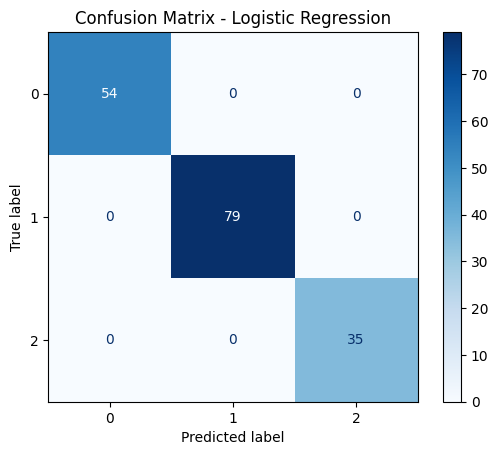

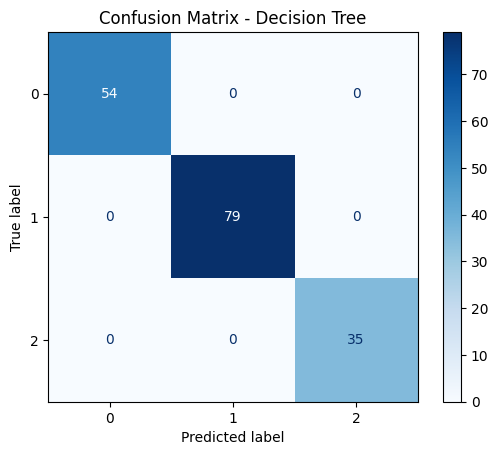

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=dt_model.classes_)
disp_dt.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Potensi Masalah
Akurasi yang sempurna biasanya mengindikasikan salah satu dari beberapa hal berikut:

Dataset terlalu sederhana atau data sudah terpisah dengan sangat baik.

Semua fitur mungkin memiliki hubungan linear yang jelas dengan target, sehingga model dapat memprediksi dengan sangat mudah.
Overfitting pada dataset.

Jika dataset terlalu kecil atau data uji berasal dari distribusi yang sangat mirip dengan data latih, model dapat dengan mudah menghafal pola tanpa generalisasi.
Kurangnya variabilitas dalam data.

Data mungkin kurang kompleks atau terlalu bersih, sehingga model tidak diuji untuk menangani data yang lebih bervariasi.

Rekomendasi untuk Analisis Lanjutan
1. Periksa Dataset
Tinjau kembali apakah dataset mencerminkan kasus nyata dan memiliki kompleksitas yang memadai.
Periksa distribusi fitur dan target (label) untuk memastikan ada keragaman.
2. Gunakan Cross-Validation
Lakukan evaluasi dengan teknik K-Fold Cross-Validation untuk memeriksa konsistensi performa model pada berbagai subset data.

In [26]:
from sklearn.model_selection import cross_val_score

# Cross-validation Logistic Regression
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5)
print(f"Cross-Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean Accuracy Logistic Regression: {cv_scores_lr.mean():.2f}")

# Cross-validation Decision Tree
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean Accuracy Decision Tree: {cv_scores_dt.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-Validation Scores (Logistic Regression): [0.70833333 0.67857143 0.69642857 0.68263473 0.70658683]
Mean Accuracy Logistic Regression: 0.69
Cross-Validation Scores (Decision Tree): [1.         1.         1.         0.99401198 0.98802395]
Mean Accuracy Decision Tree: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pesan ConvergenceWarning yang muncul saat melakukan cross-validation pada Logistic Regression menunjukkan bahwa solver tidak berhasil menemukan konvergensi dalam jumlah iterasi yang ditentukan (max_iter). Ini dapat terjadi karena:

Data tidak diskalakan dengan baik.
Jumlah iterasi (max_iter) terlalu kecil.
Solver yang digunakan tidak optimal untuk dataset tertentu.


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Skalakan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Logistic Regression dengan iterasi lebih tinggi dan solver alternatif
lr_model = LogisticRegression(random_state=42, max_iter=5000, solver='saga')

# Cross-validation Logistic Regression
cv_scores_lr = cross_val_score(lr_model, X_scaled, y, cv=5)
print(f"Cross-Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean Accuracy Logistic Regression: {cv_scores_lr.mean():.2f}")


Cross-Validation Scores (Logistic Regression): [1.         0.99404762 1.         1.         0.98802395]
Mean Accuracy Logistic Regression: 1.00


Cross-Validation Scores:

Nilai ini menunjukkan akurasi model pada masing-masing fold (subset data) selama proses k-fold cross-validation

1.00: Model memprediksi semua data dengan benar pada fold ke-1, ke-3, dan ke-4.
0.99404762: Akurasi pada fold ke-2 adalah 99.40%.
0.98802395: Akurasi pada fold ke-5 adalah 98.80%.


Mean Accuracy Logistic Regression: 1.00 berarti rata-rata akurasi dari semua fold adalah 100% (atau hampir 100% dengan pembulatan).

mean_accuracy = (1 + 0.99404762 + 1 + 1 + 0.98802395) / 5

Mean Accuracy = 0.996814714


Model Sempurna atau Hampir Sempurna:

Model Logistic Regression Anda memiliki akurasi sangat tinggi pada seluruh subset data selama cross-validation.
Kinerja yang Konsisten:

Tidak ada fold dengan nilai akurasi yang terlalu rendah, menunjukkan model memiliki kinerja yang konsisten di seluruh dataset.
Potensi Masalah Overfitting:

Jika dataset terlalu sederhana atau tidak mencerminkan kompleksitas data di dunia nyata, model mungkin overfitting (yaitu, belajar menghafal pola pada dataset alih-alih generalisasi).

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter yang akan diuji
param_grid = {
    'solver': ['lbfgs', 'saga'],
    'penalty': ['l2'],  # L2 regularization
    'C': [0.01, 0.1, 1, 10]  # Regularization strength
}

# Model Logistic Regression
lr_model = LogisticRegression(max_iter=5000, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_scaled, y)

# Hasil terbaik
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy: 1.00


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Parameter yang akan diuji
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search.fit(X, y)

# Hasil terbaik
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_:.2f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [30]:
print("Jumlah NaN di Dataset:", X.isnull().sum().sum())
print("Ada nilai inf di Dataset:", np.isinf(X).values.any())


Jumlah NaN di Dataset: 0
Ada nilai inf di Dataset: False


In [31]:
# Mengganti NaN dengan nilai rata-rata kolom
X.fillna(X.mean(), inplace=True)

# Mengganti nilai inf dengan nilai maksimum/terbesar
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)


In [32]:
rf_best_model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=10,
    bootstrap=False,
    random_state=42
)
rf_best_model.fit(X_train, y_train)

# Evaluasi ulang pada data uji
y_pred_best = rf_best_model.predict(X_test)
print("Classification Report - Tuned Random Forest:")
print(classification_report(y_test, y_pred_best))


Classification Report - Tuned Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        35

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Classification Report - Tuned Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        35

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168

Accuracy (Tuned Random Forest): 1.00


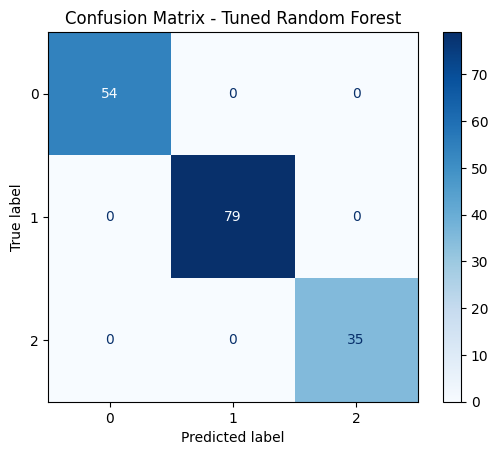

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Gunakan model dengan hyperparameter terbaik
rf_best_model = RandomForestClassifier(
    n_estimators=random_search.best_params_['n_estimators'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    max_depth=random_search.best_params_['max_depth'],
    bootstrap=random_search.best_params_['bootstrap'],
    random_state=42
)

# Latih model terbaik pada data latih
rf_best_model.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred_best = rf_best_model.predict(X_test)

# Evaluasi metrik
print("Classification Report - Tuned Random Forest:")
print(classification_report(y_test, y_pred_best))

# Akurasi
accuracy_tuned = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (Tuned Random Forest): {accuracy_tuned:.2f}")

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=rf_best_model.classes_)
disp_best.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Hasil evaluasi menunjukkan bahwa model Random Forest yang telah dituning dengan hyperparameter terbaik menghasilkan performa sempurna dengan akurasi 100% dan metrik precision, recall, F1-score masing-masing juga 1.00 pada data uji.

--------------------------------------------
Analisis Hasil
Akurasi Sempurna (100%):

Model berhasil memprediksi semua sampel dalam data uji dengan benar. Ini ditunjukkan oleh nilai akurasi yang mencapai 1.00.
Hasil ini mungkin menunjukkan bahwa dataset terlalu sederhana atau model telah mempelajari pola dengan sangat baik karena data memiliki hubungan yang jelas.
Metrik Evaluasi Lain:

Precision, Recall, dan F1-Score semuanya bernilai 1.00, artinya model tidak membuat kesalahan prediksi dalam setiap kelas (0, 1, 2).


-------------------------------------------------
Rekomendasi untuk Validasi Tambahan
1. Uji dengan Data Baru (Unseen Data)
Cobalah menguji model Anda pada dataset yang benar-benar baru, yang tidak digunakan dalam proses pelatihan maupun evaluasi sebelumnya, untuk memvalidasi kemampuan model dalam generalisasi.

2. Periksa Keseimbangan Dataset
Periksa apakah dataset memiliki distribusi kelas yang seimbang atau tidak, karena ketidakseimbangan dapat membuat model terlihat lebih akurat dari yang sebenarnya.

print("Distribusi Kelas:")
print(y.value_counts())

----
Kesimpulan
Model yang telah dituning bekerja dengan sangat baik pada dataset saat ini, tetapi Anda perlu memvalidasi apakah model dapat menangani data baru atau data dengan noise.
Hasil ini dapat digunakan sebagai baseline, tetapi perlu diuji lebih lanjut untuk memastikan bahwa model tidak hanya bekerja pada dataset ini saja.
--------------------------------

